In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("/Users/oas/Documents/VOD/vod/docker_memory_logs/692101.csv", delimiter=r"\s\s+", engine="python")

In [16]:
df = df.query("NAME != 'NAME'") # remove headers

In [17]:
# change name of timestamp
columns = df.columns.tolist()
columns[0] = "TIMESTAMP"
df.columns = columns

In [18]:
df.TIMESTAMP = pd.to_datetime(df.TIMESTAMP)
df.TIMESTAMP = df.TIMESTAMP + pd.Timedelta(hours=1)


In [19]:
def convert_memory_usage(s):
    if "KiB" in s:
        return float(s.split("/")[0][:-4]) / 1024
    elif "MiB" in s:
        return float(s.split("/")[0][:-4])
    elif "GiB" in s:
        return float(s.split("/")[0][:-4]) * 1024
    else:
        return None

df["MEMORY_USAGE_MB"] = df["MEM USAGE / LIMIT"].apply(convert_memory_usage)


In [20]:
print("processes:", df.NAME.unique())

processes: ['0.00%' 'milvus-etcd' 'milvus-minio' 'milvus-standalone']


In [21]:
def plot_memory_usage(df):
    for process in df.NAME.unique():
        df_subset = df.query(f"NAME == '{process}'")
        # t = range(0,len(memory_usage))
        plt.plot(df_subset.TIMESTAMP, df_subset.MEMORY_USAGE_MB, label=process, marker="x")
        plt.xticks(rotation=45)
        #plt.title(f"{process} memory usage")
        plt.xlabel("timestamp")
        plt.ylabel("Memory Usage (MiB)")
    plt.legend()

In [23]:
plt.figure(figsize=(15, 5))
plot_memory_usage(df)

_T = []

ts = [timestamp for _, timestamp in _T]
timestamps = pd.to_datetime(ts)

plt.vlines(timestamps, 0, df.MEMORY_USAGE_MB.max())
for label, timestamp in _T:
    plt.text(
        pd.to_datetime(timestamp),
        df.MEMORY_USAGE_MB.max(),
        label,
        rotation=45,
        verticalalignment="bottom",
        c="darkblue",
    )
plt.show()

AttributeError: 'DataFrame' object has no attribute 'NAME'

<Figure size 1500x500 with 0 Axes>

In [25]:
df

,MEMORY_USAGE_MB
TIMESTAMP,
2024-01-25 13:25:40,0.00
2024-01-25 13:25:43,141.22
2024-01-25 13:25:45,184.35
2024-01-25 13:25:47,186.36
2024-01-25 13:25:49,187.40
...,...
2024-01-25 13:28:38,640.21
2024-01-25 13:28:40,640.50
2024-01-25 13:28:42,641.00


In [27]:
df = df.groupby("TIMESTAMP").sum()

In [31]:
df.query("TIMESTAMP < '2024-01-25 13:25:49'")

,MEMORY_USAGE_MB
TIMESTAMP,
2024-01-25 13:25:40,0.00
2024-01-25 13:25:43,141.22
2024-01-25 13:25:45,184.35
2024-01-25 13:25:47,186.36


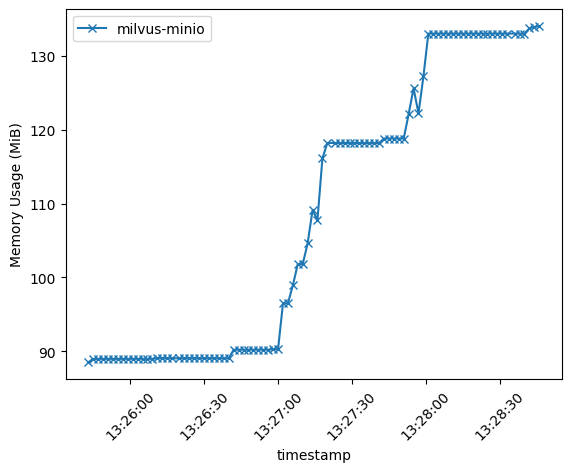

In [ ]:
plot_memory_usage(df.query("NAME == 'milvus-minio'"))